### このテキストについて

- ####  テキストの目的
確率分布を意識的に用いた実装に触れる
Pythonのディクショナリに触れる

- #### どのように学ぶか
ここでは、6つあるダーツのまとの中から一つ選びダーツを投げるシミュレーションを作成します。\
シミューレーションと言っても動画ではなく、以下のようなものを作成します。


Image from Gyazo


注意していただきたいのは、__ダーツのまとを選ぶ行為とダーツの矢が刺さる場所__ をプログラミングでどう表現するかです。


そしてダーツ投げの実装を通して、確率分布やディクショナリについても学んでいきます。

### ダーツ投げのシミュレーションの作成

実装する上での前提条件を以下に示します。


- 複数のダーツのまとは、間を空けずに横一列に並んでいるとします。
- ある番号のまとに狙ったダーツは、他のまとには行かないとします。

実装するフローは以下になります。


- 1. ダーツのまとを選びます。（ここではサイコロを振り、出た目の番号を狙うまとの番号とします。）
- 2. サイコロで出た番号のまとを選び、ダーツを投げます。（ここではダーツが刺さる場所は正規分布に従うとします。）
- 3. ダーツが刺さった場所を記録します。（x座標、y座標だけではなく、どの番号のまとに向かって投げたかも記録します。）
- 4. 1~3を指定回数（ダーツの投げる回数）だけ繰り返します。（指定回数は任意です。）
- 5. 各番号のダーツが刺さった場所をプロットします。（ダーツのまとが6個なら、6個のダーツのまとが横に等間隔で並んでいるイメージです。）

これらのフローを以下の問題を通じて一つ一つ実装していきましょう。

In [1]:
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline

### 【問題1】ダーツのまとを選ぶ

ダーツのまとを選ぶためにサイコロを実装しましょう。


《ヒント》


「サイコロを振る」動作を表現するのにnp.random.choice()を用います。\
こうすることで配列の中からランダムに要素を1つ選ぶことができます。

In [2]:
target_dartsboard_q1 = [1, 2, 3, 4, 5, 6] #6 targets of dartsboard
dartsboard_choice_q1 = np.random.choice(target_dartsboard_q1)
dartsboard_choice_q1

5

### 【問題2】ダーツを投げて、刺さった場所を記録する

ダーツの刺さった場所(x座標、y座標)を正規分布から値を発生させることで表現しましょう。\
__正規分布のx方向の「中心」は問題1で出たサイコロの番号、「標準偏差」は0.1としてください。__\
刺さった場所（座標）は、配列で保持するようにしてください。


《ヒント》


ダーツが刺さった場所（座標）は、二次元正規分布を真上から見たときのx座標、y座標の交点として表現しましょう。\
x座標、y座標の各値は、それぞれが独立した一次元正規分布に従うものとし、\
x座標とy座標用に、別々にnp.random.normal()から変数を発生させ、\
それらの組みを座標点として、配列で保持してください。


また、二次元正規分布はnp.random.multivariate_normal()を用いて表現することもできます。\
その場合、例えば平均値ベクトルを[0,0] (mean=[0,0])、共分散行列を[[[0.01,0],[0,0.01]] (cov=[[0.01,0],[0,0.01]])としてnp.random.multivariate_normal(mean, cov)とすると、x座標とy座標の変数の組みを作れます。

In [3]:
mu_q2, sigma_q2 = dartsboard_choice_q1, 0.1 # mean and standard deviation
x_coordinate_q2 = np.random.normal(loc=mu_q2, scale=sigma_q2, size=None)
y_coordinate_q2 = np.random.normal(loc=0.0, scale=sigma_q2, size=None)
y_coordinate_q2

-0.03449169435241061

### 【問題3】ダーツをたくさん投げて、まとの番号と紐付けた状態で記録する

ダーツを1000回投げて、全てのダーツの刺さった位置をディクショナリに格納してください。\
ディクショナリのkeyはダーツのまとの番号になります。


《ヒント》


「ダーツを1000回投げる」というのは 問題1のサイコロを1000回振る　ことに相当します。 \
問題1と問題2に加えディクショナリに座標を格納する操作をfor文の中に実装することになります。

In [4]:
NUMBER_OF_TRIAL = 1000
x_coordinate_dict = dict()
y_coordinate_dict = dict()

target_dartsboard = [1, 2, 3, 4, 5, 6] #6 targets of dartsboard

for i in range(NUMBER_OF_TRIAL):
    dartsboard_choice = np.random.choice(target_dartsboard)
    mu, sigma = dartsboard_choice, 0.1 # mean and standard deviation
    x_coordinate = np.random.normal(loc=mu, scale=sigma, size=None)
    y_coordinate = np.random.normal(loc=0.0, scale=sigma, size=None)

    x_coordinate_dict.setdefault(dartsboard_choice, []).append(x_coordinate)
    y_coordinate_dict.setdefault(dartsboard_choice, []).append(y_coordinate)

### 【問題4】ダーツのまとと刺さった位置を描画する

問題3で作成したディクショナリからkeyごとに値を取り出し、まとごとに刺さった場所を描画してみましょう。\
ダーツのまとを表現するためここではmatplotlibのpatchesクラスを用いてください。

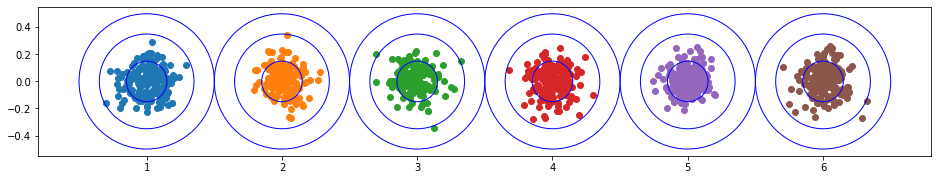

In [5]:
fig = plt.figure(figsize=(16,6))
ax = plt.axes()

for target in target_dartsboard:
    temp_x = np.array(x_coordinate_dict.get(target)).reshape(len(x_coordinate_dict.get(target)),1)
    temp_y = np.array(y_coordinate_dict.get(target)).reshape(len(y_coordinate_dict.get(target)),1)
    x_y_coordinate = np.concatenate((temp_x, temp_y), axis=1)

    plt.scatter(x_y_coordinate[:,0], x_y_coordinate[:,1])
    
    circle_out = mpatches.Circle(xy=(int(target), 0.0), radius=0.5, ec='b', fill=False)
    circle_mid = mpatches.Circle(xy=(int(target), 0.0), radius=0.35, ec='b', fill=False)
    circle_in = mpatches.Circle(xy=(int(target), 0.0), radius=0.15, ec='b', fill=False)

    ax.add_patch(circle_out)
    ax.add_patch(circle_mid)
    ax.add_patch(circle_in)
    
plt.axis('scaled')
ax.set_aspect('equal')
plt.show()

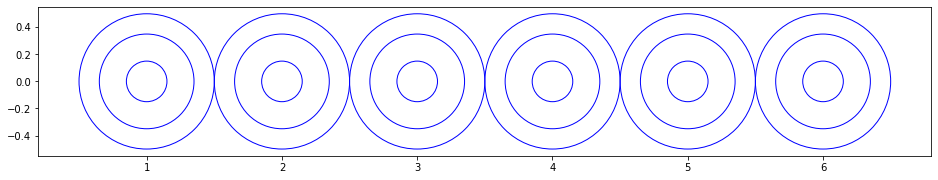

In [6]:
#  参考
fig = plt.figure(figsize=(16,6))
ax = plt.axes()

# fc = face color, ec = edge color
circle_out_1 = mpatches.Circle(xy=(1, 0.0), radius=0.5, ec='b', fill=False)
circle_out_2 = mpatches.Circle(xy=(2, 0.0), radius=0.5, ec='b', fill=False)
circle_out_3 = mpatches.Circle(xy=(3, 0.0), radius=0.5, ec='b', fill=False)
circle_out_4 = mpatches.Circle(xy=(4, 0.0), radius=0.5, ec='b', fill=False)
circle_out_5 = mpatches.Circle(xy=(5, 0.0), radius=0.5, ec='b', fill=False)
circle_out_6 = mpatches.Circle(xy=(6, 0.0), radius=0.5, ec='b', fill=False)

circle_mid_1 = mpatches.Circle(xy=(1, 0.0), radius=0.35, ec='b', fill=False)
circle_mid_2 = mpatches.Circle(xy=(2, 0.0), radius=0.35, ec='b', fill=False)
circle_mid_3 = mpatches.Circle(xy=(3, 0.0), radius=0.35, ec='b', fill=False)
circle_mid_4 = mpatches.Circle(xy=(4, 0.0), radius=0.35, ec='b', fill=False)
circle_mid_5 = mpatches.Circle(xy=(5, 0.0), radius=0.35, ec='b', fill=False)
circle_mid_6 = mpatches.Circle(xy=(6, 0.0), radius=0.35, ec='b', fill=False)

circle_in_1 = mpatches.Circle(xy=(1, 0.0), radius=0.15, ec='b', fill=False)
circle_in_2 = mpatches.Circle(xy=(2, 0.0), radius=0.15, ec='b', fill=False)
circle_in_3 = mpatches.Circle(xy=(3, 0.0), radius=0.15, ec='b', fill=False)
circle_in_4 = mpatches.Circle(xy=(4, 0.0), radius=0.15, ec='b', fill=False)
circle_in_5 = mpatches.Circle(xy=(5, 0.0), radius=0.15, ec='b', fill=False)
circle_in_6 = mpatches.Circle(xy=(6, 0.0), radius=0.15, ec='b', fill=False)

ax.add_patch(circle_out_1)
ax.add_patch(circle_out_2)
ax.add_patch(circle_out_3)
ax.add_patch(circle_out_4)
ax.add_patch(circle_out_5)
ax.add_patch(circle_out_6)

ax.add_patch(circle_mid_1)
ax.add_patch(circle_mid_2)
ax.add_patch(circle_mid_3)
ax.add_patch(circle_mid_4)
ax.add_patch(circle_mid_5)
ax.add_patch(circle_mid_6)

ax.add_patch(circle_in_1)
ax.add_patch(circle_in_2)
ax.add_patch(circle_in_3)
ax.add_patch(circle_in_4)
ax.add_patch(circle_in_5)
ax.add_patch(circle_in_6)

plt.axis('scaled')
ax.set_aspect('equal')

### 【問題5】関数化

ダーツを投げる回数、ダーツのまとの数が変わっても描画できるように、問題1~問題4で作成したコードを関数化しましょう。


《ヒント》


ダーツの投げる回数とダーツのまとの数を関数の引数にしましょう。

In [7]:
def plot_darts_coordinate(trial, board):
    """
    ダーツの投げる回数とダーツの的の数を引数として、ダーツの結果をグラフにプロットする関数

    Parameters
    --------------
    trial: int
        ダーツの投げる回数
    board: int
        ダーツの的の数
    Returns
    --------------
    Nothing:
    """
    x_coordinate_dict = dict()
    y_coordinate_dict = dict()

    target_dartsboard = list(range(1, board+1))

    for i in range(trial):
        dartsboard_choice = np.random.choice(target_dartsboard)
        mu, sigma = dartsboard_choice, 0.1 # mean and standard deviation
        x_coordinate = np.random.normal(loc=mu, scale=sigma, size=None)
        y_coordinate = np.random.normal(loc=0.0, scale=sigma, size=None)

        x_coordinate_dict.setdefault(dartsboard_choice, []).append(x_coordinate)
        y_coordinate_dict.setdefault(dartsboard_choice, []).append(y_coordinate)

    fig = plt.figure(figsize=(16,6))
    ax = plt.axes()

    for target in target_dartsboard:
        temp_x = np.array(x_coordinate_dict.get(target)).reshape(len(x_coordinate_dict.get(target)),1)
        temp_y = np.array(y_coordinate_dict.get(target)).reshape(len(y_coordinate_dict.get(target)),1)
        x_y_coordinate = np.concatenate((temp_x, temp_y), axis=1)

        plt.scatter(x_y_coordinate[:,0], x_y_coordinate[:,1])

        circle_out = mpatches.Circle(xy=(int(target), 0.0), radius=0.5, ec='b', fill=False)
        circle_mid = mpatches.Circle(xy=(int(target), 0.0), radius=0.35, ec='b', fill=False)
        circle_in = mpatches.Circle(xy=(int(target), 0.0), radius=0.15, ec='b', fill=False)

        ax.add_patch(circle_out)
        ax.add_patch(circle_mid)
        ax.add_patch(circle_in)

    plt.axis('scaled')
    ax.set_aspect('equal')
    plt.show()

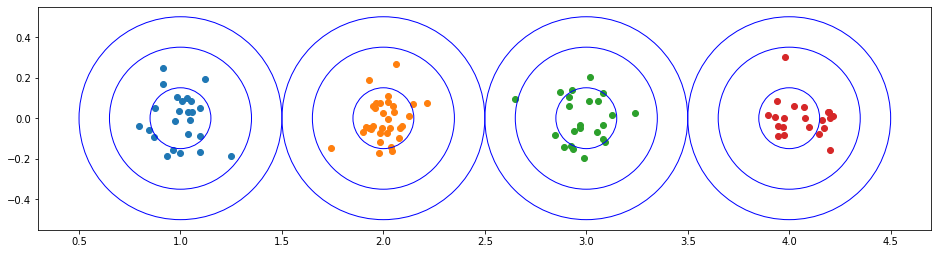

In [8]:
NUMBER_OF_TRIAL = 100
NUMBER_OF_DARTSBOARD = 4

plot_darts_coordinate(NUMBER_OF_TRIAL, NUMBER_OF_DARTSBOARD)